Random Forest Performance:
MAE: 0.004
MSE: 0.000
RMSE: 0.006
R² Score: 1.000
Approximate Accuracy: 99.93%



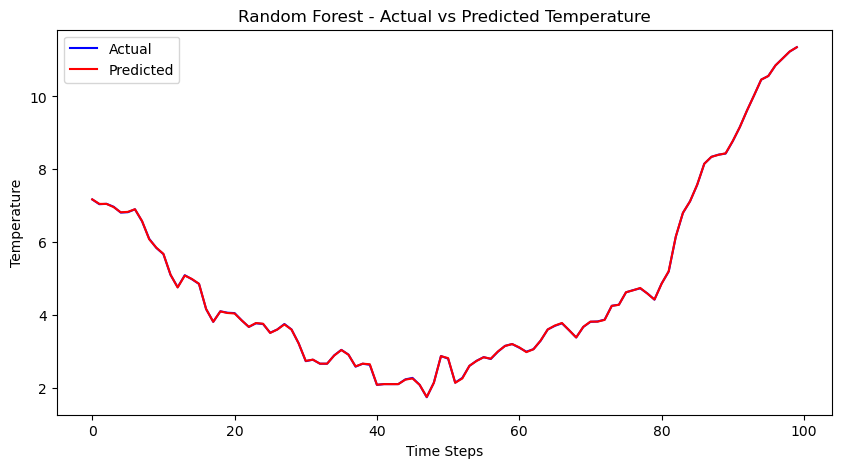

XGBoost Performance:
MAE: 0.034
MSE: 0.002
RMSE: 0.049
R² Score: 1.000
Approximate Accuracy: 99.42%



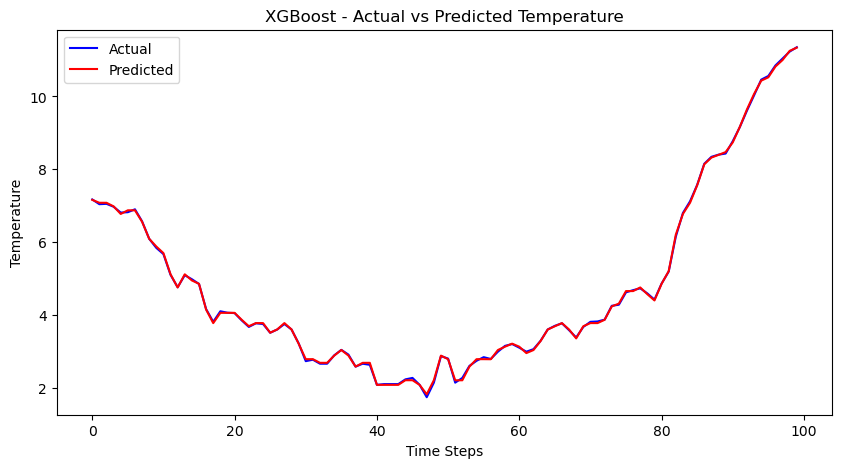

Support Vector Regressor (SVR) Performance:
MAE: 0.110
MSE: 0.075
RMSE: 0.273
R² Score: 0.997
Approximate Accuracy: 98.13%



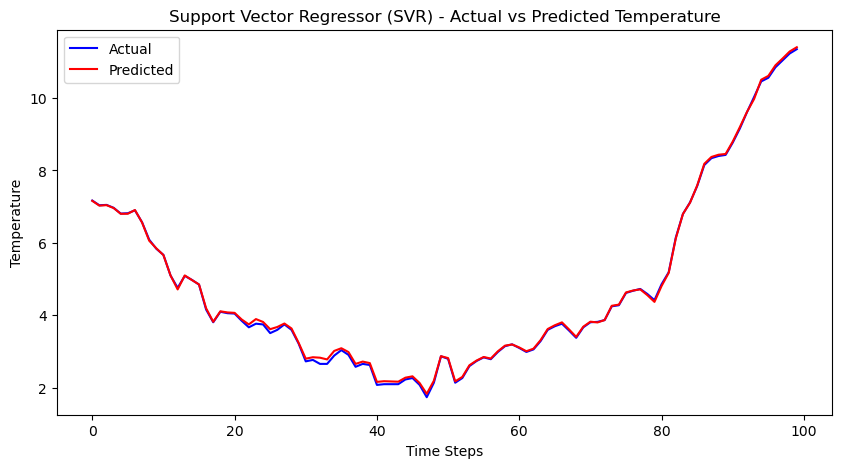

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Install missing dependencies
!pip install xgboost
from xgboost import XGBRegressor

# Load dataset
df = pd.read_csv("cleaned_weather.csv")

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Selecting target variable (Temperature 'T') and relevant features
target = 'T'
features = ['p', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'SWDR', 'PAR']

# Train-test split
train_size = int(0.8 * len(df))
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Scaling features
scaler = StandardScaler()
X_train = scaler.fit_transform(train[features])
X_test = scaler.transform(test[features])
y_train = train[target].values
y_test = test[target].values

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Train Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Function to evaluate models and plot results
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = 100 - (mae / np.mean(y_test) * 100)  # Approximate accuracy calculation
    
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"MSE: {mse:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R² Score: {r2:.3f}")
    print(f"Approximate Accuracy: {accuracy:.2f}%\n")
    
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:100], label='Actual', color='blue')
    plt.plot(y_pred[:100], label='Predicted', color='red')
    plt.title(f'{model_name} - Actual vs Predicted Temperature')
    plt.xlabel('Time Steps')
    plt.ylabel('Temperature')
    plt.legend()
    plt.show()

# Evaluate models and generate plots
evaluate_model(rf_model, X_test, y_test, "Random Forest")
evaluate_model(xgb_model, X_test, y_test, "XGBoost")
evaluate_model(svr_model, X_test, y_test, "Support Vector Regressor (SVR)")